In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np

In [3]:
MCTree_path = "/groups/icecube/simon/GNN/workspace/data/Converted_I3_file/combined_output_particles.csv"

In [4]:
def load_data(csv_file):
    """
    Load particle data from the CSV file.
    """
    return pd.read_csv(csv_file)

def basic_statistics(df):
    """
    Display basic statistics for the particle data.
    """
    return df.describe()

def filter_data(df, particle_type=None, energy_min=None, energy_max=None):
    """
    Filter the data based on particle type and energy range.
    """
    filtered = df.copy()
    if particle_type:
        filtered = filtered[filtered["Type"] == particle_type]
    if energy_min is not None:
        filtered = filtered[filtered["Energy"] >= energy_min]
    if energy_max is not None:
        filtered = filtered[filtered["Energy"] <= energy_max]
    return filtered

def visualize_energy_distribution(df, particle_type=None):
    """
    Plot the energy distribution for all particles or a specific particle type.
    """
    plt.figure(figsize=(10, 6))
    if particle_type:
        data = df[df["Type"] == particle_type]["Energy"]
        plt.hist(data, bins=50, alpha=0.7, label=f"{particle_type} Energy Distribution")
    else:
        plt.hist(df["Energy"], bins=50, alpha=0.7, label="All Particles Energy Distribution")
    plt.xlabel("Energy (GeV)")
    plt.ylabel("Frequency")
    plt.title("Particle Energy Distribution")
    plt.legend()
    plt.grid()
    plt.show()

def visualize_position(df):
    """
    Plot the particle positions in 3D space.
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df["PosX"], df["PosY"], df["PosZ"], c=df["Energy"], cmap="viridis", s=10)
    plt.colorbar(scatter, label="Energy (GeV)")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    ax.set_zlabel("Z (m)")
    ax.set_title("Particle Positions in 3D Space")
    plt.show()

def calculate_start_and_end_positions(df):
    """
    Calculate start and end positions for particles based on the track length,
    azimuth, and zenith angles.
    """
    start_pos = np.array(
        [df["PosX"], df["PosY"], df["PosZ"]]
    ).T

    travel_vec = -1 * np.array(
        [
            df["Length"] * np.cos(df["DirAzimuth"]) * np.sin(df["DirZenith"]),
            df["Length"] * np.sin(df["DirAzimuth"]) * np.sin(df["DirZenith"]),
            df["Length"] * np.cos(df["DirZenith"]),
        ]
    ).T

    end_pos = start_pos + travel_vec

    df["end_x"] = end_pos[:, 0]
    df["end_y"] = end_pos[:, 1]
    df["end_z"] = end_pos[:, 2]

    return df
def visualize_end_point(df):
    """
    Plot the particle end points in 3D space.
    """
    border_xy = np.array(
                [
                    (-256.1400146484375, -521.0800170898438),
                    (-132.8000030517578, -501.45001220703125),
                    (-9.13000011444092, -481.739990234375),
                    (114.38999938964844, -461.989990234375),
                    (237.77999877929688, -442.4200134277344),
                    (361.0, -422.8299865722656),
                    (405.8299865722656, -306.3800048828125),
                    (443.6000061035156, -194.16000366210938),
                    (500.42999267578125, -58.45000076293945),
                    (544.0700073242188, 55.88999938964844),
                    (576.3699951171875, 170.9199981689453),
                    (505.2699890136719, 257.8800048828125),
                    (429.760009765625, 351.0199890136719),
                    (338.44000244140625, 463.7200012207031),
                    (224.5800018310547, 432.3500061035156),
                    (101.04000091552734, 412.7900085449219),
                    (22.11000061035156, 509.5),
                    (-101.05999755859375, 490.2200012207031),
                    (-224.08999633789062, 470.8599853515625),
                    (-347.8800048828125, 451.5199890136719),
                    (-392.3800048828125, 334.239990234375),
                    (-437.0400085449219, 217.8000030517578),
                    (-481.6000061035156, 101.38999938964844),
                    (-526.6300048828125, -15.60000038146973),
                    (-570.9000244140625, -125.13999938964844),
                    (-492.42999267578125, -230.16000366210938),
                    (-413.4599914550781, -327.2699890136719),
                    (-334.79998779296875, -424.5),
                ]
            )
    border_z = np.array([-512.82, 524.56])
    
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df["end_x"], df["end_y"], df["end_z"], c=df["Energy"], cmap="viridis", s=10)
    plt.colorbar(scatter, label="Energy (GeV)")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    ax.set_zlabel("Z (m)")
    ax.set_title("Particle End Points in 3D Space")
    plt.show()
    
    # Make a x and y plot
    # Plot the border_xy
    
    fig, ax = plt.subplots()
    ax.plot(border_xy[:, 0], border_xy[:, 1], c="black")	
    
    scatter = ax.scatter(df["end_x"], df["end_y"], c=df["Energy"], cmap="viridis", s=10)
    plt.colorbar(scatter, label="Energy (GeV)")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    ax.set_title("Particle End Points in 2D Space")
    plt.show()
    

Index(['FileID', 'EventID', 'ParticleID', 'Type', 'Energy', 'PosX', 'PosY',
       'PosZ', 'DirZenith', 'DirAzimuth', 'Time', 'Length'],
      dtype='object')


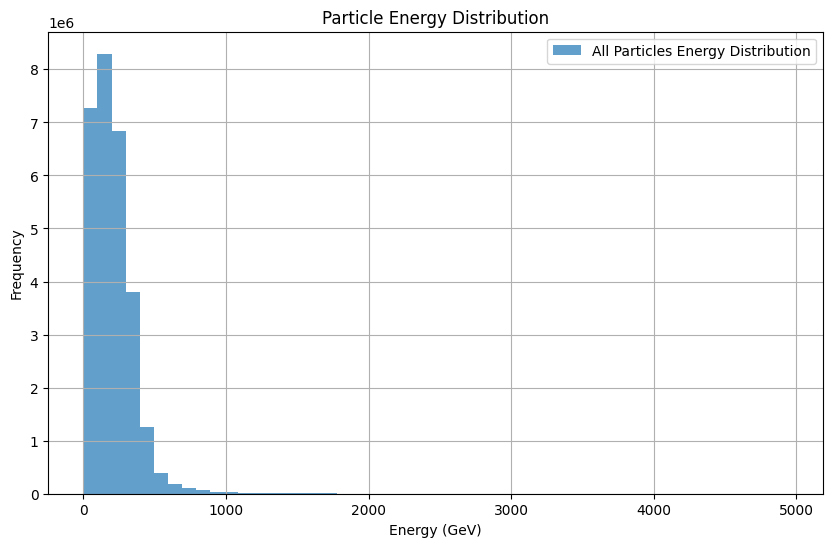

KeyboardInterrupt: 

In [5]:
df = load_data(MCTree_path)
#Print columns
print(df.columns)
muons = filter_data(df, particle_type="MuMinus")
visualize_energy_distribution(muons)

calculate_start_and_end_positions(muons)
visualize_position(muons)

: 

: 

In [34]:
# Find how many muons are within the border in x, y and z
muons_in_border = muons[
    (muons["PosX"] >= border_xy[:, 0].min())
    & (muons["PosX"] <= border_xy[:, 0].max())
    & (muons["PosY"] >= border_xy[:, 1].min())
    & (muons["PosY"] <= border_xy[:, 1].max())
    & (muons["PosZ"] >= border_z.min())
    & (muons["PosZ"] <= border_z.max())
]
print(f"Number of muons within the border: {len(muons_in_border)}")
print(f"Number of muons in total: {len(muons)}")

Number of muons within the border: 844077
Number of muons in total: 1448303


: 

: 

In [27]:
# print amount of unique events
print(f"Number of unique events: {len(muons['EventID'].unique())}")

Number of unique events: 56348


: 

: 

In [9]:
# Print x, y, z, and energy of the first 5 muons
#print(muons[["FileID","EventID", "PosX", "PosY", "PosZ", "Energy","Length"]].head())

#Filter for particles so only the first muon of each eventID is left
muons_first = muons.groupby(["FileID", "EventID"]).first().reset_index()
print(muons_first[["FileID","EventID", "PosX", "PosY", "PosZ", "Energy","Length"]].head())
print(len(muons_first))

   FileID  EventID        PosX        PosY        PosZ      Energy  \
0       0        4  389.185245  698.952677  322.709354  162.407362   
1       0        8  452.624062  595.215334  800.000000  346.093807   
2       0       10 -766.653675 -228.565400  755.841589  280.020316   
3       0       23 -790.623029  122.127910  210.916286  277.560873   
4       0       24  486.512144  635.063724  341.293017  191.229173   

        Length  
0   627.547441  
1  1307.389196  
2   930.611369  
3   959.810321  
4   519.751422  
1037307


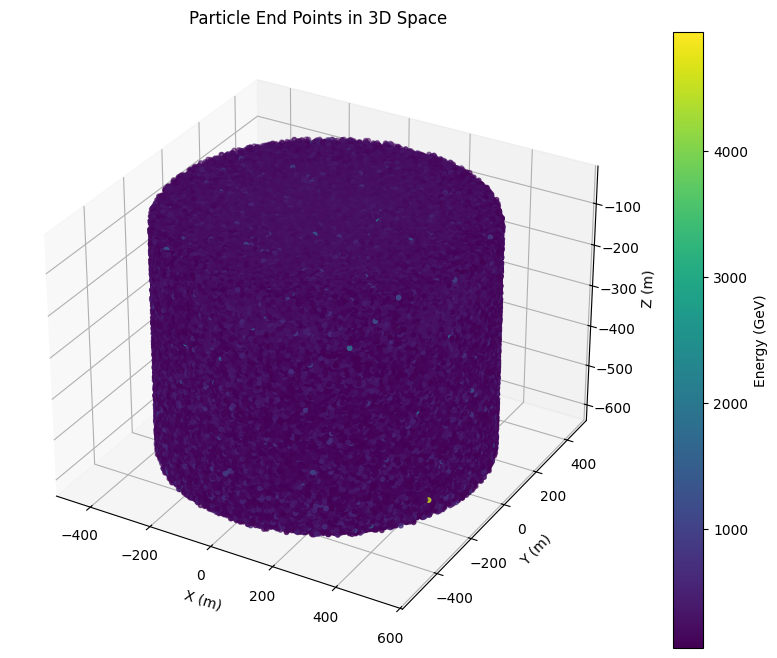

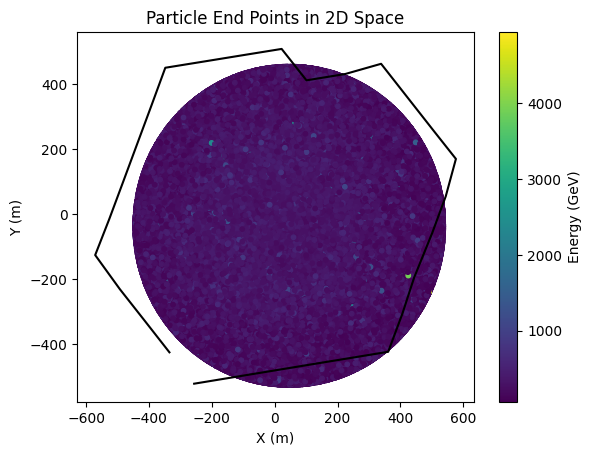

In [10]:
calculate_start_and_end_positions(muons_first)
visualize_end_point(muons_first)
#visualize_energy_distribution(muons_first)

In [12]:
border_xy = np.array(
            [
                (-256.1400146484375, -521.0800170898438),
                (-132.8000030517578, -501.45001220703125),
                (-9.13000011444092, -481.739990234375),
                (114.38999938964844, -461.989990234375),
                (237.77999877929688, -442.4200134277344),
                (361.0, -422.8299865722656),
                (405.8299865722656, -306.3800048828125),
                (443.6000061035156, -194.16000366210938),
                (500.42999267578125, -58.45000076293945),
                (544.0700073242188, 55.88999938964844),
                (576.3699951171875, 170.9199981689453),
                (505.2699890136719, 257.8800048828125),
                (429.760009765625, 351.0199890136719),
                (338.44000244140625, 463.7200012207031),
                (224.5800018310547, 432.3500061035156),
                (101.04000091552734, 412.7900085449219),
                (22.11000061035156, 509.5),
                (-101.05999755859375, 490.2200012207031),
                (-224.08999633789062, 470.8599853515625),
                (-347.8800048828125, 451.5199890136719),
                (-392.3800048828125, 334.239990234375),
                (-437.0400085449219, 217.8000030517578),
                (-481.6000061035156, 101.38999938964844),
                (-526.6300048828125, -15.60000038146973),
                (-570.9000244140625, -125.13999938964844),
                (-492.42999267578125, -230.16000366210938),
                (-413.4599914550781, -327.2699890136719),
                (-334.79998779296875, -424.5),
            ]
        )
border_z = np.array([-512.82, 524.56])

In [13]:
# Find how many muons stops within the border in x, y and z
end_x, end_y, end_z = muons_first["end_x"], muons_first["end_y"], muons_first["end_z"]
muons_stopped_in_border = muons_first[
    (end_x >= border_xy[:, 0].min())
    & (end_x <= border_xy[:, 0].max())
    & (end_y >= border_xy[:, 1].min())
    & (end_y <= border_xy[:, 1].max())
    & (end_z >= border_z.min())
    & (end_z <= border_z.max())
]
print(f"Number of muons that stopped within the border: {len(muons_stopped_in_border)}")
print(f"Number of muons in total: {len(muons_first)}")

Number of muons that stopped within the border: 859791
Number of muons in total: 1037307


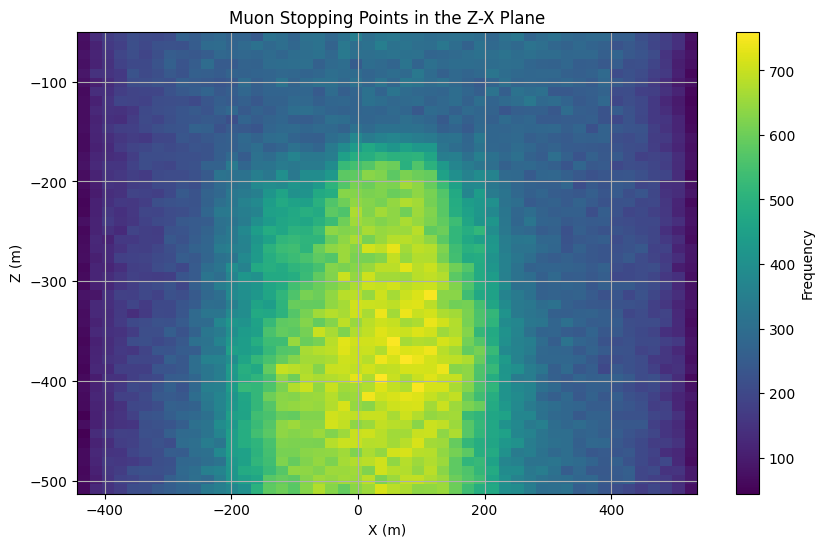

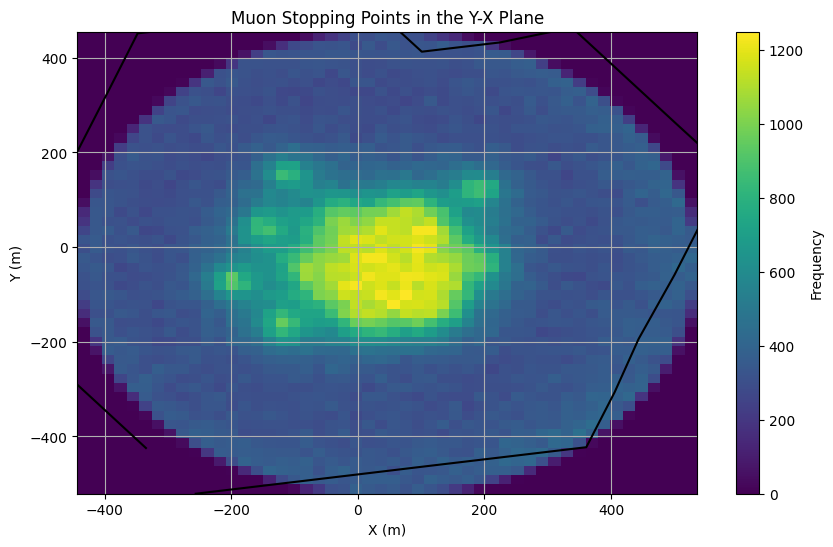

In [21]:
# Plot the stopping points of the muons in the z-x plane with a density plot

plt.figure(figsize=(10, 6))
plt.hist2d(muons_stopped_in_border["end_x"], muons_stopped_in_border["end_z"], bins=50, cmap="viridis")
plt.xlabel("X (m)")
plt.ylabel("Z (m)")
plt.colorbar(label="Frequency")
plt.title("Muon Stopping Points in the Z-X Plane")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist2d(muons_stopped_in_border["end_x"], muons_stopped_in_border["end_y"], bins=50, cmap="viridis")
plt.plot(border_xy[:, 0], border_xy[:, 1], c="black")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.colorbar(label="Frequency")
plt.title("Muon Stopping Points in the Y-X Plane")
plt.grid()
plt.show()